In [5]:
import pandas as pd
from mplsoccer import Pitch
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [6]:
data = pd.read_csv("Data/Duke/DukeUSDShots.csv").reset_index()

In [7]:
data

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Enter a game,0.0,1st Ball,Successful,"[36.85714285714284, 38.095238095238095]","[36.85714285714284, 38.095238095238095]",Duke
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Enter a game,0.0,Tackle,Successful,"[25.428571428571416, 32.19047619047619]","[18.190476190476176, 18.47619047619048]",USD
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
61,61,Enter a game,7.0,Set Piece,Unsuccessful,"[119.33333333333331, 0.1904761904761898]","[115.14285714285714, 39.80952380952381]",Duke
62,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,63,Enter a game,7.0,Tackle,Successful,"[115.33333333333331, 37.714285714285715]","[99.9047619047619, 38.85714285714286]",USD
64,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.dropna(inplace=True)
startX = []
startY = []
endX = []
endY = []
for i in range(data.shape[0]):
    row = data.iloc[i]
    startX.append(float(row.get("Start Pos").split(", ")[0][1:]))
    startY.append(float(row.get("Start Pos").split(", ")[1][:-1]))
    endX.append(float(row.get("End Pos").split(", ")[0][1:]))
    endY.append(float(row.get("End Pos").split(", ")[1][:-1]))
data = data.assign(startX = startX)
data =data.assign(startY = startY)
data =data.assign(endX = endX)
data =data.assign(endY = endY)
oppSide = dict()
for i in data.get("numOpportunity").unique():
    df = data[data.get("numOpportunity")==i]
    endX = df.iloc[-1].get("endX")
    if endX >60:
        side = "right"
    elif endX<=60:
        side = "left"
    oppSide[i]=side
data = data.assign(Side = data.get("numOpportunity").apply(lambda num:oppSide[num]))
rightOpportunities = data[data.get("Side") == "right"]
rightOpportunities = rightOpportunities.assign(startX = 120-rightOpportunities.get("startX"))
rightOpportunities = rightOpportunities.assign(startY = 80-rightOpportunities.get("startY"))
rightOpportunities = rightOpportunities.assign(endX = 120-rightOpportunities.get("endX"))
rightOpportunities = rightOpportunities.assign(endY = 80-rightOpportunities.get("endY"))
leftOpportunities = data[data.get("Side") == "left"]
opportunities = pd.merge(rightOpportunities, leftOpportunities,how = "outer")
opportunities

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,startX,startY,endX,endY,Side
0,1,Enter a game,0.0,1st Ball,Successful,"[36.85714285714284, 38.095238095238095]","[36.85714285714284, 38.095238095238095]",Duke,36.857143,38.095238,36.857143,38.095238,left
1,3,Enter a game,0.0,Tackle,Successful,"[25.428571428571416, 32.19047619047619]","[18.190476190476176, 18.47619047619048]",USD,25.428571,32.190476,18.190476,18.476190,left
2,5,Enter a game,0.0,Shot(foot),Unsuccessful,"[17.619047619047606, 18.66666666666667]","[1.4285714285714164, 38.095238095238095]",Duke,17.619048,18.666667,1.428571,38.095238,left
3,7,Enter a game,1.0,Tackle,Successful,"[30.380952380952372, 46.666666666666664]","[30.190476190476183, 46.666666666666664]",Duke,30.380952,46.666667,30.190476,46.666667,left
4,9,Enter a game,1.0,Pass,Successful,"[21.428571428571416, 34.85714285714286]","[7.523809523809511, 26.285714285714292]",Duke,21.428571,34.857143,7.523810,26.285714,left
5,11,Enter a game,1.0,Shot(foot),Unsuccessful,"[7.3333333333333215, 25.904761904761912]","[0.6666666666666572, 30.85714285714286]",Duke,7.333333,25.904762,0.666667,30.857143,left
6,13,Enter a game,2.0,1st Ball,Successful,"[85.8095238095238, 19.80952380952381]","[72.09523809523807, 40.38095238095238]",USD,34.190476,60.190476,47.904762,39.619048,right
7,15,Enter a game,2.0,Pass,Successful,"[69.61904761904759, 55.42857142857143]","[89.04761904761904, 75.04761904761905]",Duke,50.380952,24.571429,30.952381,4.952381,right
8,17,Enter a game,2.0,Pass,Unsuccessful,"[115.7142857142857, 64.38095238095238]","[116.47619047619045, 48.952380952380956]",Duke,4.285714,15.619048,3.523810,31.047619,right
9,19,Enter a game,2.0,Tackle,Unsuccessful,"[116.47619047619045, 49.523809523809526]","[118.0, 49.904761904761905]",USD,3.523810,30.476190,2.000000,30.095238,right


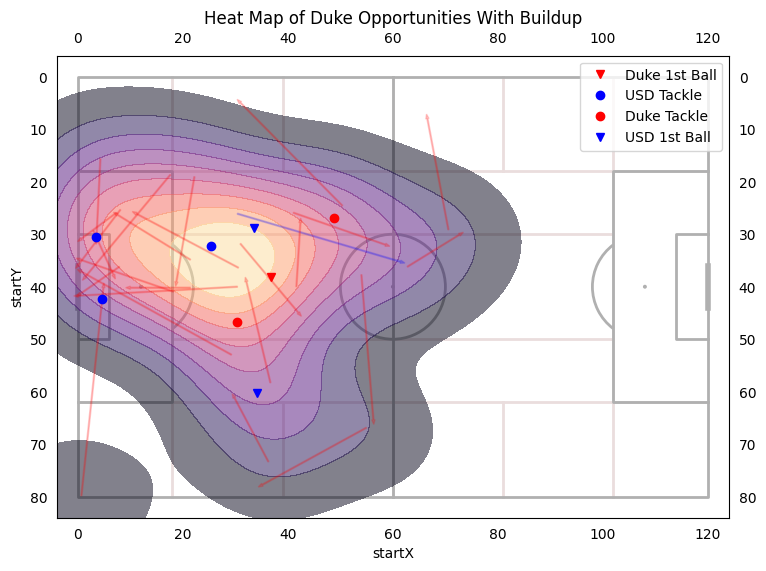

In [37]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=opportunities.get("startX"),y=opportunities.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(opportunities.shape[0]):
    row = opportunities.iloc[i]
    team = row.get("Team")
    if team == "USD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="1st Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "USD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2,color = color)
plt.title("Heat Map of Duke Opportunities With Buildup")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())

In [10]:
origins =[]
for i in range(int(opportunities.get("numOpportunity").max())+1):
    limited = opportunities[opportunities.get("numOpportunity") == i].iloc[0]
    origins.append(limited)
origins = pd.DataFrame(origins)

In [11]:
origins

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,startX,startY,endX,endY,Side
0,1,Enter a game,0.0,1st Ball,Successful,"[36.85714285714284, 38.095238095238095]","[36.85714285714284, 38.095238095238095]",Duke,36.857143,38.095238,36.857143,38.095238,left
3,7,Enter a game,1.0,Tackle,Successful,"[30.380952380952372, 46.666666666666664]","[30.190476190476183, 46.666666666666664]",Duke,30.380952,46.666667,30.190476,46.666667,left
6,13,Enter a game,2.0,1st Ball,Successful,"[85.8095238095238, 19.80952380952381]","[72.09523809523807, 40.38095238095238]",USD,34.190476,60.190476,47.904762,39.619048,right
12,25,Enter a game,3.0,Pass,Unsuccessful,"[89.61904761904759, 53.904761904761905]","[58.57142857142856, 44.76190476190476]",USD,30.380952,26.095238,61.428571,35.238095,right
22,45,Enter a game,4.0,Tackle,Successful,"[71.14285714285714, 53.142857142857146]","[-1, -1]",Duke,48.857143,26.857143,121.000000,81.000000,right
25,51,Enter a game,5.0,1st Ball,Successful,"[86.38095238095238, 51.23809523809524]","[94.76190476190476, 61.333333333333336]",USD,33.619048,28.761905,25.238095,18.666667,right
28,57,Enter a game,6.0,Set Piece,Successful,"[83.33333333333331, 21.714285714285722]","[87.9047619047619, 40.952380952380956]",Duke,36.666667,58.285714,32.095238,39.047619,right
30,61,Enter a game,7.0,Set Piece,Unsuccessful,"[119.33333333333331, 0.1904761904761898]","[115.14285714285714, 39.80952380952381]",Duke,0.666667,79.809524,4.857143,40.190476,right


Text(0.5, 1.0, 'Duke Shots Origin')

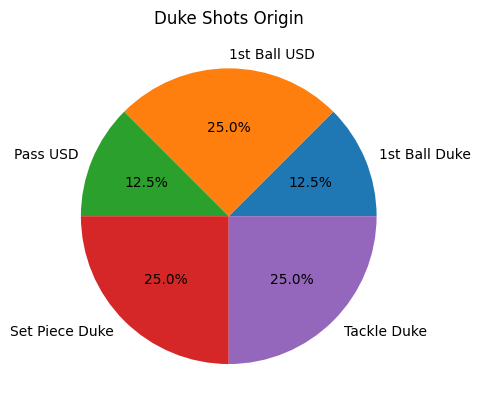

In [13]:
originCounts = origins.groupby(["Event","Team"]).count().reset_index()
labels = originCounts.get("Event") + " "+originCounts.get("Team")
plt.pie(originCounts.get("index"),labels = labels,autopct='%1.1f%%')
plt.title("Duke Shots Origin")

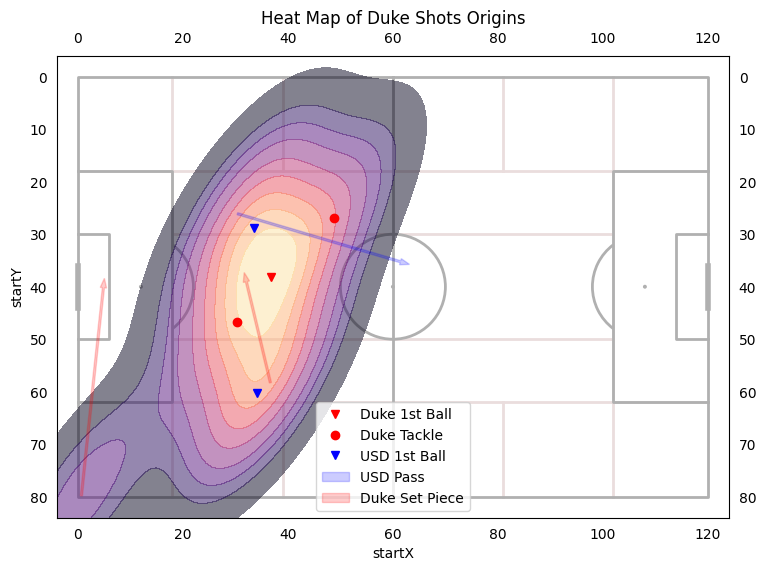

In [33]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=origins.get("startX"),y=origins.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(origins.shape[0]):
    row = origins.iloc[i]
    team = row.get("Team")
    if team == "USD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="1st Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "USD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+ " "+row.get("Event"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = .2,color =color,label = team+ " "+row.get("Event"))
plt.title("Heat Map of Duke Shots Origins")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())


Text(0.5, 1.0, 'Heat Map of Duke Shots')

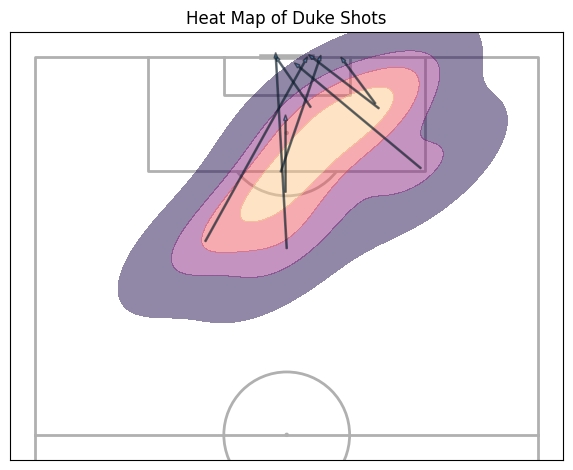

In [34]:
shots = opportunities[opportunities.get("Event").apply(lambda event: "Shot" in event)]
pitch = VerticalPitch(half=True, axis=True)
fig, ax = pitch.draw()
kde = sns.kdeplot(y=120-shots.get("startX"),x=80-shots.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 5,cmap = "magma")
for i in range(shots.shape[0]):
    row = shots.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(80-row.get("startY"),120-row.get("startX"),-1*(row.get("endY")-row.get("startY")),-1*(row.get("endX")-row.get("startX")),width = .2,alpha = .5)
plt.title("Heat Map of Duke Shots")

In [20]:
#shot assists
shotAssists = []
for i in range(1, opportunities.shape[0]):
    previous = opportunities.iloc[i-1]
    row = opportunities.iloc[i]
    if "Shot" in row.get("Event"):
        shotAssists.append([previous.get("numOpportunity"),previous.get("Game"),previous.get("Team"),previous.get("Event"),previous.get("Result"),previous.get("startX"),previous.get("startY"),previous.get("endX"),previous.get("endY"),row.get("Result")])
shotAssists = pd.DataFrame(shotAssists,columns=["numOpportunity","Game","Team","Event","Event Result","startX","startY","endX",'endY',"Shot result"])

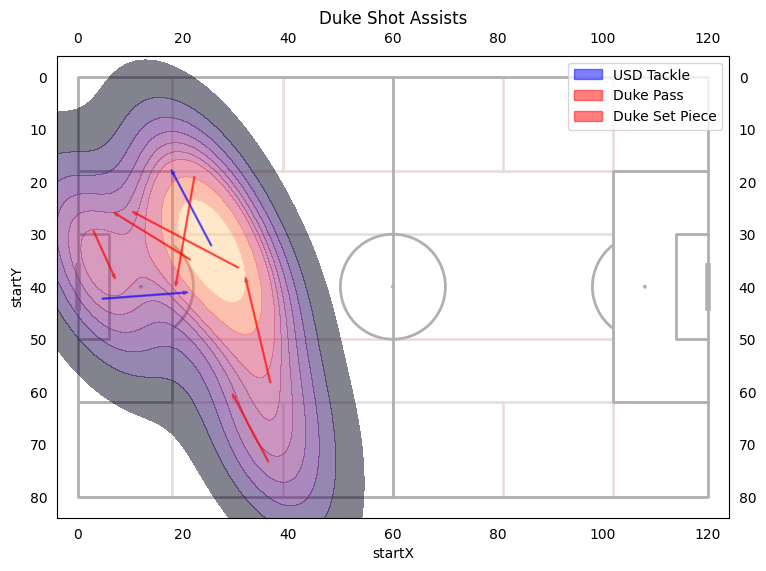

In [35]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=shotAssists.get("startX"),y=shotAssists.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")
for i in range(shotAssists.shape[0]):
    row = shotAssists.iloc[i]
    team = row.get("Team")
    if team == "Duke":
        color = "Red"
    else:
        color = "Blue"
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .5,color = color, label = team+" "+row.get("Event"))
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("Duke Shot Assists")
plt.show()

,,numOpportunity,Game,Event Result,startX,startY,endX,endY,Shot result
Event,Team,,,,,,,,
Pass,Duke,5,5,5,5,5,5,5,5
Set Piece,Duke,1,1,1,1,1,1,1,1
Tackle,USD,2,2,2,2,2,2,2,2


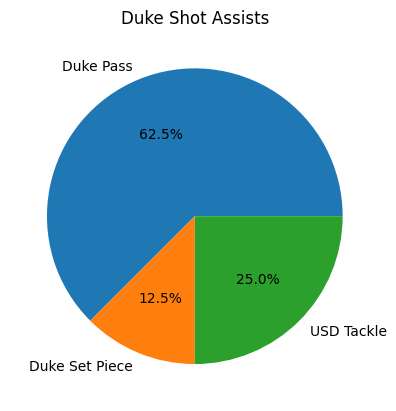

In [36]:
counts = shotAssists.groupby(["Event","Team"]).count()
plt.pie(counts.get("Game"),labels=["Duke Pass","Duke Set Piece","USD Tackle"],autopct='%1.1f%%')
plt.title("Duke Shot Assists")
counts